In [2]:
import pandas as pd
from settings import STORAGE_DIR
import os

In [4]:
all_dfs = []
for f in os.listdir(STORAGE_DIR / 'adapter_finetuned' / 'results'):
    df = pd.read_pickle(STORAGE_DIR / 'adapter_finetuned' / 'results' / f)

    fold_num = f.split('.')[-2][-1]
    df['fold_num'] = fold_num
    all_dfs.append(df)

In [5]:
full_results_df = pd.concat(all_dfs)

In [8]:
full_results_df.fold_num.value_counts()

1    2893
2    2869
3    2757
0    2742
Name: fold_num, dtype: int64

In [9]:
import numpy as np
labels_full = {}
preds_full = {}
for fold in range(4):
    labels_full[fold] = np.vstack(full_results_df.loc[full_results_df.fold_num == str(fold)]['labels'].values)
    preds_full[fold] = np.vstack(full_results_df.loc[full_results_df.fold_num == str(fold)]['preds'].values)

In [10]:
from sklearn.metrics import r2_score, mean_squared_error

r2_scores = {}
mse_scores = {}

for fold in range(4):
    r2_scores[fold] = []
    mse_scores[fold] = []

    for idx in range(labels_full[fold].shape[1]):
        r2_scores[fold].append(r2_score(labels_full[fold][:, idx], preds_full[fold][:, idx])) 
        mse_scores[fold].append(mean_squared_error(labels_full[fold][:, idx], preds_full[fold][:, idx])) 


In [11]:
mean_r2_scores = [np.mean(v) for k, v in r2_scores.items()]
mean_mse_scores = [np.mean(v) for k, v in mse_scores.items()]

In [13]:
adapter_results = pd.DataFrame({'Model': ['Adapters'] * 4, 'test_r2_mean': mean_r2_scores, 'test_mse_mean': mean_mse_scores})

<AxesSubplot:xlabel='Model', ylabel='test_r2_mean'>

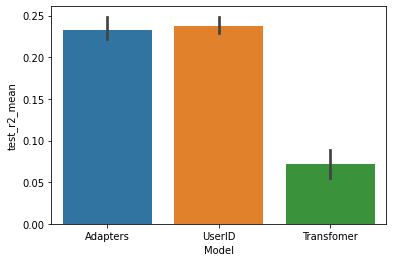

In [14]:
import seaborn as sns

user_id_results = pd.read_csv(STORAGE_DIR / 'doccano_reg.csv')
user_id_results = user_id_results.loc[user_id_results.model_type == 'transformer_user_id']

user_id_results['Model'] = "Transfomer"
user_id_results.loc[user_id_results.append_annotator_ids, 'Model'] = 'UserID'

user_id_results = user_id_results[['Model', 'test_r2_mean', 'test_mse_mean']]

df = pd.concat([adapter_results, user_id_results])


sns.barplot(data=df, y='test_r2_mean', x='Model')

<AxesSubplot:xlabel='Model', ylabel='test_mse_mean'>

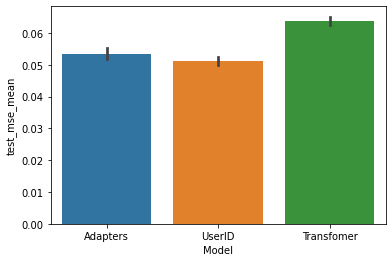

In [15]:
sns.barplot(data=df, y='test_mse_mean', x='Model')
